# Kamień milowy 2(Inżynieria cech, wstępne modelowanie)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
congressional_voting_df = pd.read_csv("congressional_voting_dataset.csv")

In [21]:
map = {"y": 1, "n" : 0, "?": np.nan, "democrat" : 1, "republican" : 0}

columns = congressional_voting_df.columns.to_list()
for column in columns:
    congressional_voting_df[column] = congressional_voting_df[column].map(map)

congressional_voting_df.head(5)

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(congressional_voting_df.drop("political_party", axis=1), 
                                                    congressional_voting_df["political_party"], 
                                                    test_size=0.33, random_state=42)

In [33]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train)

X_train = pd.DataFrame(imp.transform(X_train), columns = X_train.columns.to_list())
X_test = pd.DataFrame(imp.transform(X_test), columns = X_test.columns.to_list())

In [34]:
X_train

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
287,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
288,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
289,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


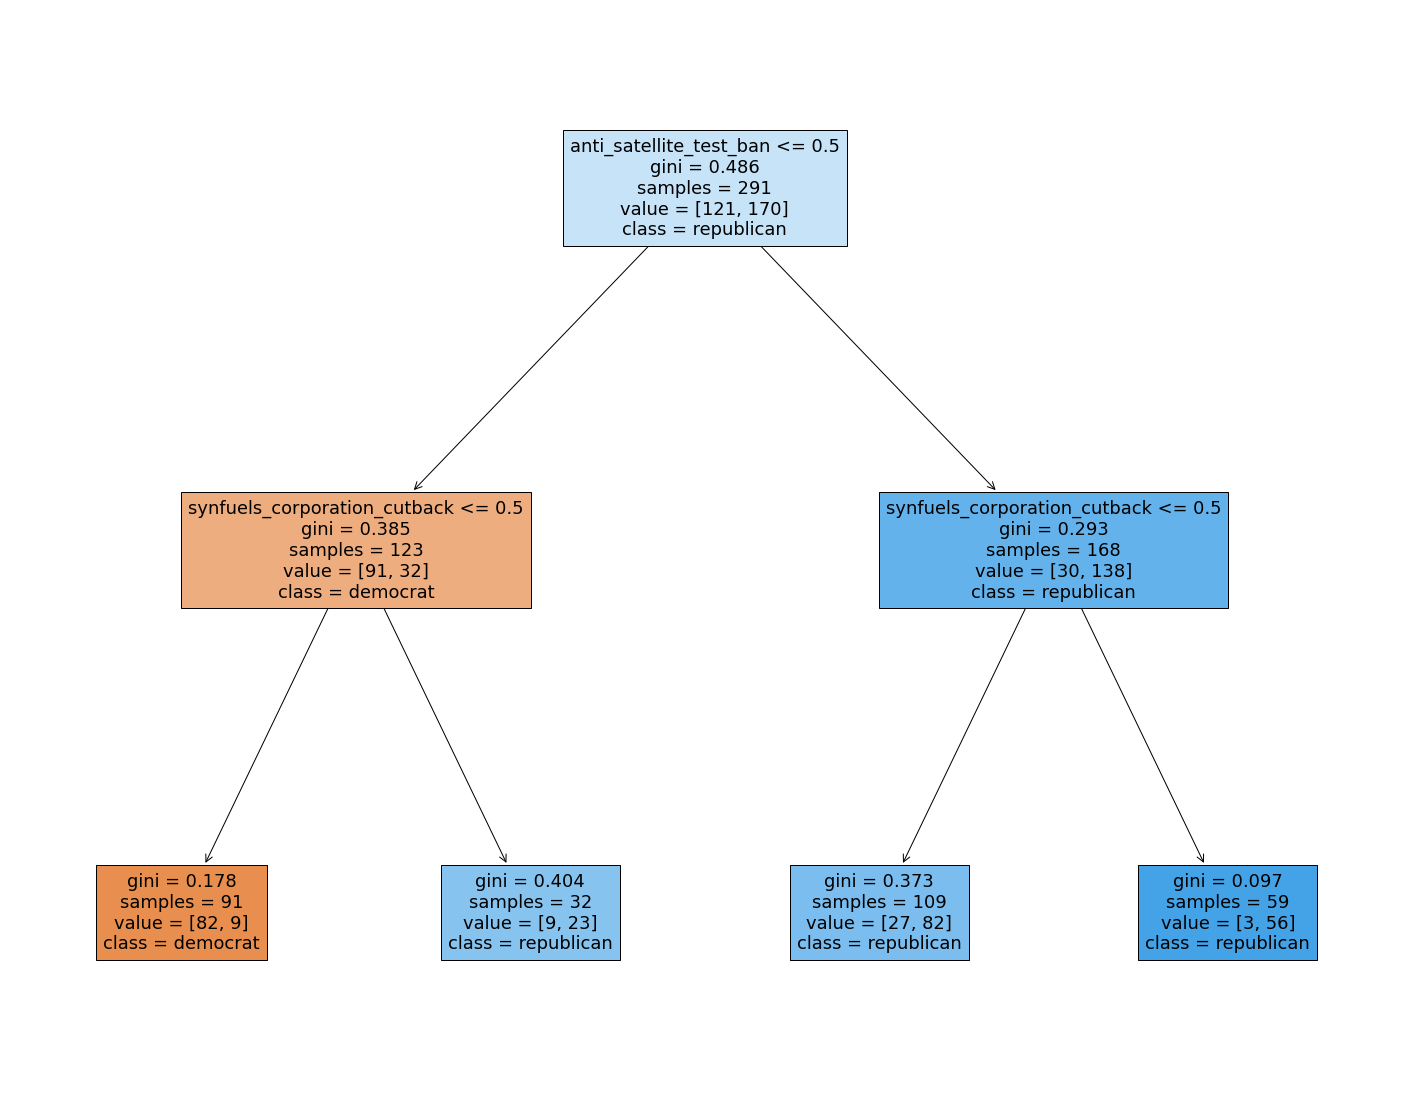

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
X = X_train[["anti_satellite_test_ban", "synfuels_corporation_cutback"]]
model = clf.fit(X, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns.to_list(),  
                   class_names=["democrat", "republican"],
                   filled=True)

In [36]:
X = X_test[["anti_satellite_test_ban", "synfuels_corporation_cutback"]]
clf.score(X, y_test)

0.7986111111111112

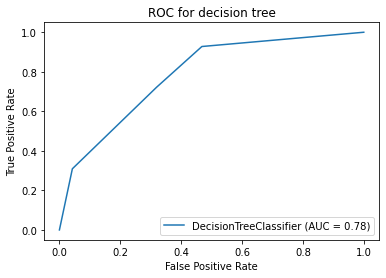

In [37]:
from sklearn import metrics

metrics.plot_roc_curve(clf, X, y_test)
plt.title("ROC for decision tree")
plt.show()

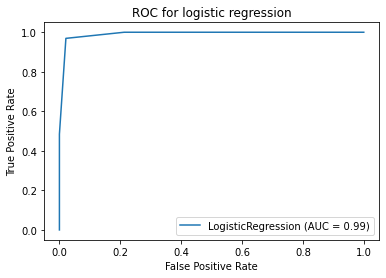

In [46]:
from sklearn.linear_model import LogisticRegression

X = X_train[["physician_fee_freeze", "synfuels_corporation_cutback"]]
lg = LogisticRegression(random_state=0)
lg.fit(X, y_train)

X = X_test[["physician_fee_freeze", "synfuels_corporation_cutback"]]
metrics.plot_roc_curve(lg, X, y_test)
plt.title("ROC for logistic regression")
plt.show()

In [47]:
lg.score(X, y_test)

0.9722222222222222